In [1]:
import os, shutil, pathlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
import keras
#from tensorflow.keras import layers

2024-11-04 13:26:14.972718: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-04 13:26:16.306363: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 13:26:19.513467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
'''
import requests
from urllib.parse import urlencode
from io import BytesIO
from zipfile import ZipFile

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/ZIA9UxQPMWN_8A'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
response = requests.get(download_url)

dist_path = '/home/jupyter/datasphere/project/'
zipfile = ZipFile(BytesIO(response.content))
zipfile.extractall(path=dist_path)

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    '/home/jupyter/datasphere/project/d20/train',
    image_size=(299, 299),
    color_mode="grayscale",
    batch_size=64)
validation_dataset = image_dataset_from_directory(
    '/home/jupyter/datasphere/project/d20/valid',
    image_size=(299, 299),
    color_mode="grayscale",
    batch_size=64)
test_dataset = image_dataset_from_directory(
    '/home/jupyter/datasphere/project/d20/test',
    image_size=(299, 299),
    color_mode="grayscale",
    batch_size=64)

Found 33207 files belonging to 20 classes.
Found 298 files belonging to 20 classes.
Found 161 files belonging to 20 classes.


In [4]:
class_names = train_dataset.class_names
print(class_names)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9']


In [5]:
model = keras.applications.Xception(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(299, 299, 1),
    pooling=None,
    classes=20,
    classifier_activation="softmax",
    #name="xception",
)
model = keras.Model(inputs=model.input, outputs=model.outputs)

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [7]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_accuracy")
]
history = model.fit(
    train_dataset,
    epochs = 50,
    validation_data=validation_dataset,
    callbacks=callbacks)

2024-11-04 07:40:03.279404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [33207]
	 [[{{node Placeholder/_4}}]]
2024-11-04 07:40:03.280055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [33207]
	 [[{{node Placeholder/_4}}]]


Epoch 1/50


2024-11-04 07:40:14.319764: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2024-11-04 07:40:17.961170: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x5580c4f3d600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-04 07:40:17.961246: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2024-11-04 07:40:18.120846: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-04 07:40:19.086353: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


519/519 [==============================] - ETA: 0s - loss: 2.9714 - accuracy: 0.0715

2024-11-04 07:45:09.208532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [298]
	 [[{{node Placeholder/_4}}]]
2024-11-04 07:45:09.209026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [298]
	 [[{{node Placeholder/_4}}]]


519/519 [==============================] - 311s 531ms/step - loss: 2.9714 - accuracy: 0.0715 - val_loss: 3.0506 - val_accuracy: 0.0336
Epoch 2/50
519/519 [==============================] - 270s 519ms/step - loss: 2.8612 - accuracy: 0.1080 - val_loss: 98.6359 - val_accuracy: 0.0570
Epoch 3/50
519/519 [==============================] - 270s 519ms/step - loss: 2.4323 - accuracy: 0.2046 - val_loss: 9.5315 - val_accuracy: 0.0604
Epoch 4/50
519/519 [==============================] - 270s 519ms/step - loss: 1.2605 - accuracy: 0.5593 - val_loss: 45.5390 - val_accuracy: 0.0638
Epoch 5/50
519/519 [==============================] - 270s 519ms/step - loss: 0.4981 - accuracy: 0.8294 - val_loss: 14.6372 - val_accuracy: 0.1074
Epoch 6/50
519/519 [==============================] - 268s 516ms/step - loss: 0.2620 - accuracy: 0.9138 - val_loss: 10.9298 - val_accuracy: 0.0940
Epoch 7/50
519/519 [==============================] - 268s 516ms/step - loss: 0.1714 - accuracy: 0.9442 - val_loss: 33.6404 - val_a

In [8]:
model.save('/home/jupyter/datasphere/project/model.keras')

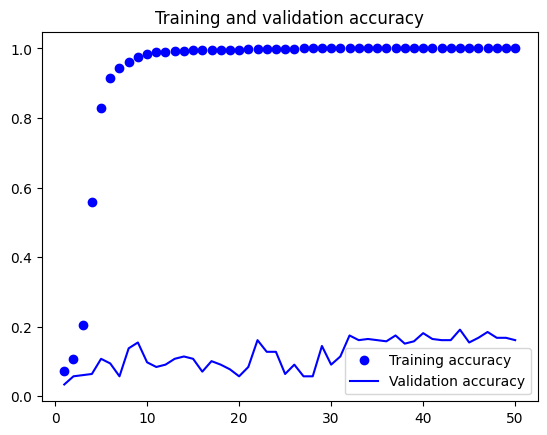

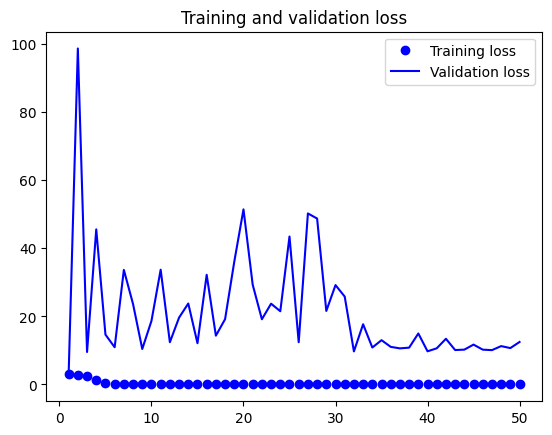

In [9]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [11]:
test_validation_model = keras.models.load_model(
 "/home/jupyter/datasphere/project/convnet_from_scratch.keras")
test_loss, test_acc = test_validation_model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

5/5 [==============================] - 2s 130ms/step - loss: 10.2315 - accuracy: 0.1913
Test accuracy: 0.191


In [4]:
test_model = keras.models.load_model(
 "/home/jupyter/datasphere/project/convnet_from_scratch.keras")
test_loss, test_acc = test_validation_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

NameError: name 'test_validation_model' is not defined

In [2]:
test_model = keras.models.load_model(
 "/home/jupyter/datasphere/project/convnet_from_scratch.keras")

2024-11-04 13:26:31.468946: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [19]:
input_folder = '/home/jupyter/datasphere/project/sort1/'
    # загрузка списка файлов из папки
files = os.listdir(input_folder)
def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        input_folder + img_path,color_mode='grayscale', target_size=target_size)
    array = keras.utils.img_to_array(img)
    #array = np.expand_dims(array, axis=0)
    return array
img_array = x = np.array([np.array(get_img_array(img_path, target_size=(299, 299))) for img_path in files])

In [20]:
img_array.shape

(10, 299, 299, 1)

In [21]:
predictions = test_model.predict(img_array, batch_size=None, verbose="auto", steps=None, callbacks=None)

1/1 [==============================] - 1s 945ms/step


In [22]:
print(predictions)

[[3.28335348e-17 4.10418330e-08 5.20109034e-17 1.54386622e-13
  3.86008381e-09 2.07562244e-12 5.81663233e-12 3.44714795e-12
  5.19168979e-11 8.69992700e-09 9.93676841e-01 2.37441837e-11
  6.32313080e-03 2.57951130e-19 4.96617662e-15 3.63607488e-17
  3.43955071e-15 5.64223737e-11 2.50110821e-14 4.11569780e-12]
 [1.38652761e-12 5.16830187e-06 1.42171330e-09 1.16858382e-06
  2.23901134e-06 1.03617221e-08 5.11822473e-05 1.05239008e-06
  2.46348120e-02 9.67216194e-01 2.09619454e-03 5.84015813e-09
  5.95623767e-03 1.52230726e-14 1.01544529e-07 8.85813818e-12
  2.20022089e-09 3.56267774e-05 3.64368691e-13 8.48111914e-10]
 [4.40919701e-09 6.08573964e-06 2.43363441e-09 1.00876048e-06
  2.30831745e-07 2.75060599e-11 7.49399187e-05 4.21800372e-09
  2.87013227e-05 9.97970045e-01 9.68423556e-04 2.57647162e-06
  1.03373884e-06 2.45650167e-11 3.63848335e-06 1.29427458e-09
  4.73835244e-05 8.95884586e-04 1.26942226e-13 1.28282220e-08]
 [3.13330268e-08 9.25834000e-04 1.33863525e-08 4.52383756e-05
  4.8

In [23]:
throw_dice_list = []
class_names = [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 3, 4, 5, 6, 7, 8, 9]
for i in range(len(predictions)):

  x = np.argmax(predictions[i])
  # if x > 0.9
  throw_dice_list.append(class_names[x])

print(len(predictions))
print(len(throw_dice_list))
print(throw_dice_list)

10
10
[19, 18, 18, 18, 2, 18, 19, 20, 19, 19]


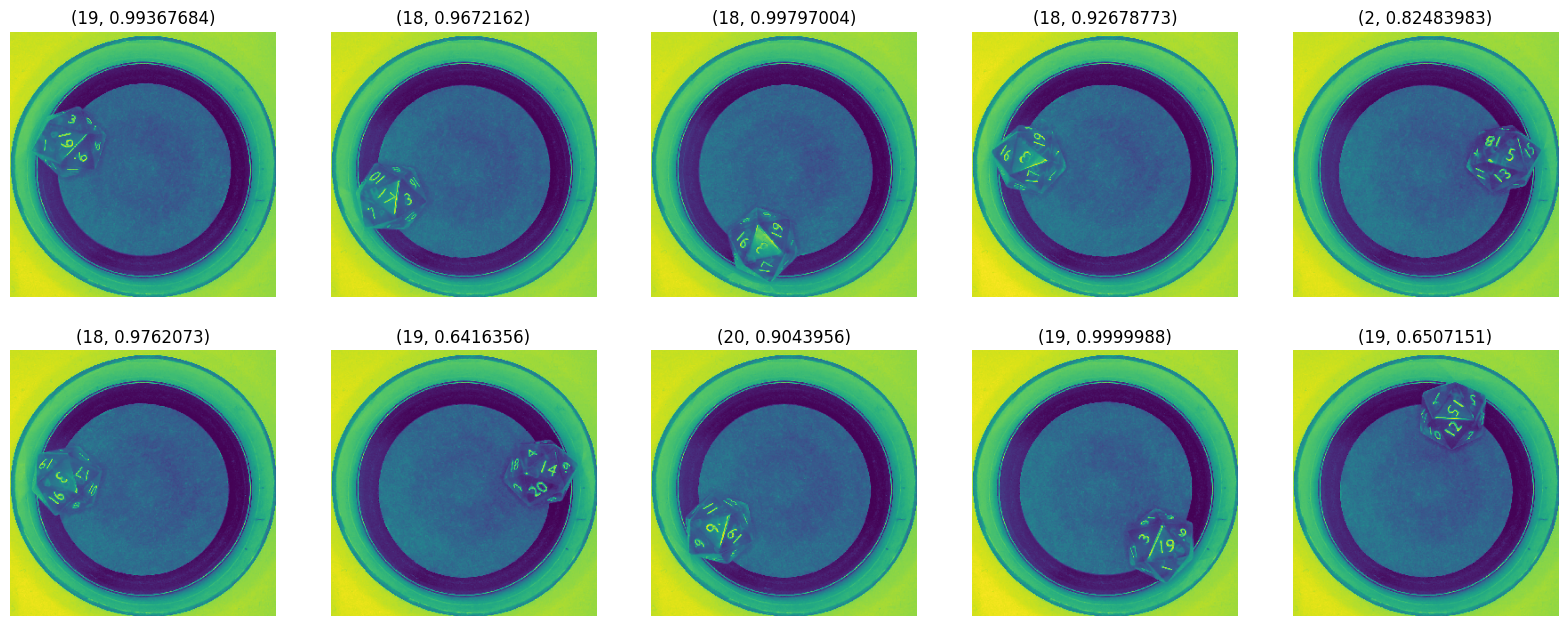

In [24]:
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(img_array[i])
    plt.title((throw_dice_list[i],
               max(predictions[i])))
    #plt.title(max(predictions[i]))
    #plt.title(class_names[labels[i]])
    plt.axis("off")